## Table of contents
* [Introduction](#introduction)
* [Data](#data)
* [Methodology and Analysis](#methodologyandanalysis)
* [Producing the forecast](#forecast)
* [Conclusion](#conclusion)

## Introduction: <a name="introduction"></a>

In this project we will develop a forecast model to predict gold prices, Please not that this model is for scientific and research purposes only, and should not be used as a guide for Investing.

## Data <a name ="data"></a>

In this project we will be utlizing a single dataset containing daily prices from  1978 to 2019. The data was orginally obtained from goldhub.org, as a single .xlsx files containing excel sheets ordering the data by various ways (monthly,daily etc.). I took the sheet containg daily data, copied it to a seperate file, fixed the formatting and saved it as a .csv file for ease of use and simplicity. 

In [15]:
#import libraries needed
import numpy as np #import library to handle data in a vectorized manner
import statsmodels.api as sm #statiscal functions/models
import pandas as pd #library for data analysis 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#Matplotlib  for plotting
import matplotlib.cm as cm 
import matplotlib.colors as colors
import matplotlib.pyplot as plt

print('Libraries imported')

import warnings
import itertools
#ignore all warnings
warnings.filterwarnings("ignore")



Libraries imported


Now lets import the data

In [2]:
G = pd.read_csv(r'C:\Users\a\Desktop\Gold Prices.csv')
G.head()

,Name,US dollar,Euro,Japanese yen,Pound sterling,Canadian dollar,Swiss franc,Indian rupee,Chinese renmimbi,US dollar.1,Turkish lira,Saudi riyal,Indonesian rupiah,UAE dirham,Thai baht,Vietnamese dong,Egyptian pound,Korean won,Euro.1,Russian ruble,US dollar.2,South African rand,Chinese renmimbi.1,Canadian dollar.1,Australian dollar,G5 currency index,Producer index,Consumer index
0,1978-12-29,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.1,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1979-01-01,226.0,137.1,NaN,110.7,NaN,NaN,NaN,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.1,NaN,226.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1979-01-02,226.8,137.3,43164.9,111.5,263.7,359.6,1792.9,NaN,226.8,NaN,735.6,138160.5,851.3,4454.6,NaN,NaN,107470.0,137.3,NaN,226.8,194.6,NaN,263.7,193.6,NaN,NaN,NaN
3,1979-01-03,218.6,134.0,43717.9,108.0,264.4,365.9,1802.2,NaN,218.6,NaN,739.4,138877.0,855.7,4477.7,NaN,NaN,108027.4,134.0,NaN,218.6,192.2,NaN,264.4,193.0,NaN,NaN,NaN
4,1979-01-04,223.2,136.8,43674.9,110.7,264.1,366.4,1811.7,NaN,223.2,NaN,743.4,139616.3,860.3,4501.5,NaN,NaN,108602.5,136.8,NaN,223.2,193.0,NaN,264.1,194.6,NaN,NaN,NaN


Next we will clean the data



For the sake of simplicity we will conduct the analysis using only Canadian dollars as the currency

In [3]:
#create new dataframe using Name and Canadian dollar columns
Gold = G.loc[: , ['Name', 'Canadian dollar']]
Gold.rename(columns={'Name':'Day', 'Canadian dollar':'Price (CAD)'}, inplace=True) #rename the columns

Gold.head()

,Day,Price (CAD)
0,1978-12-29,NaN
1,1979-01-01,NaN
2,1979-01-02,263.7
3,1979-01-03,264.4
4,1979-01-04,264.1


Next we are going to deal with the missing values

First we will identify how many missing values we have

In [4]:
#get info
Gold.info()
Gold.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10692 entries, 0 to 10691
Data columns (total 2 columns):
Day            10691 non-null object
Price (CAD)    10689 non-null float64
dtypes: float64(1), object(1)
memory usage: 167.1+ KB


Day             object
Price (CAD)    float64
dtype: object

From the above we can see that we have only 1 missing values, for this analysis we are going to drop those two values

In [5]:
#drop missing values
Gold.dropna(axis=0,inplace=True)
Gold.head()

,Day,Price (CAD)
2,1979-01-02,263.7
3,1979-01-03,264.4
4,1979-01-04,264.1
5,1979-01-05,268.4
6,1979-01-08,269.5


Next we will convert the data to a time series object using the day as our index.

In [6]:
from datetime import datetime
con=Gold['Day']
Gold['Day']=pd.to_datetime(Gold['Day'])
Gold.set_index('Day', inplace=True)
#check datatype of index
Gold.index

DatetimeIndex(['1979-01-02', '1979-01-03', '1979-01-04', '1979-01-05',
               '1979-01-08', '1979-01-09', '1979-01-10', '1979-01-11',
               '1979-01-12', '1979-01-15',
               ...
               '2019-12-09', '2019-12-10', '2019-12-11', '2019-12-12',
               '2019-12-13', '2019-12-16', '2019-12-17', '2019-12-18',
               '2019-12-19', '2019-12-20'],
              dtype='datetime64[ns]', name='Day', length=10689, freq=None)

In [7]:
Gold.dtypes

Price (CAD)    float64
dtype: object

To make the dataset easier to work with, we will resample the data using the average of every month, and setting the time stamp to the first of every month

In [9]:
y = Gold['Price (CAD)'].resample('MS').mean()

In [10]:
#see a section of the data
y['2014':]

Day
2014-01-01    1358.926087
2014-02-01    1437.475000
2014-03-01    1483.776190
2014-04-01    1427.718182
2014-05-01    1402.677273
2014-06-01    1385.361905
2014-07-01    1407.330435
2014-08-01    1414.728571
2014-09-01    1362.640909
2014-10-01    1371.178261
2014-11-01    1331.890000
2014-12-01    1383.260870
2015-01-01    1510.231818
2015-02-01    1534.535000
2015-03-01    1487.022727
2015-04-01    1479.036364
2015-05-01    1459.661905
2015-06-01    1461.236364
2015-07-01    1451.373913
2015-08-01    1470.566667
2015-09-01    1492.095455
2015-10-01    1514.313636
2015-11-01    1441.738095
2015-12-01    1464.952174
2016-01-01    1556.866667
2016-02-01    1656.438095
2016-03-01    1646.004348
2016-04-01    1593.333333
2016-05-01    1629.740909
2016-06-01    1645.622727
2016-07-01    1744.000000
2016-08-01    1741.330435
2016-09-01    1736.845455
2016-10-01    1676.985714
2016-11-01    1661.772727
2016-12-01    1532.713636
2017-01-01    1571.072727
2017-02-01    1617.765000
2017-03-

## Methodology and Analysis: <a name="methodologyandanalysis"></a>

In this section we will begin with our analysis

First we will begin by plotting the data

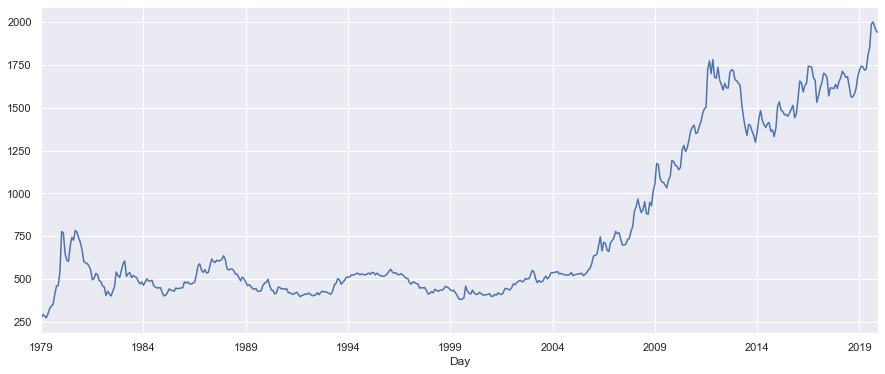

In [11]:
y.plot(figsize=(15,6))
plt.show()

From the above graph we can see a general upward trend, periods of increase and decrease, and a sharp increase in the late 2000s. We can also see some seasonality as well.

In order to visualize this better, we will use a method called time-series decompsition, to visualize the trend, seasonality, and noise. 

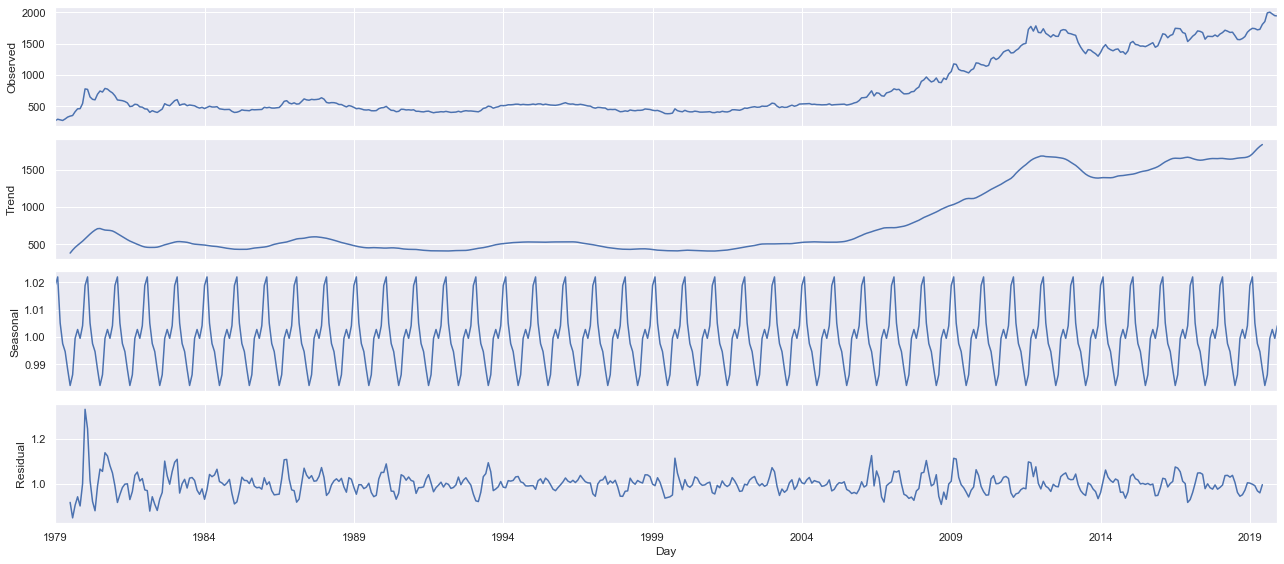

In [14]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='multiplicatve')
fig = decomposition.plot()
plt.show()

As we can see, the prices have a clear trend, as well as seasonality

Now we will begin with creating the model.

We will be using the ARIMA model (Autoregressive Integrated Moving Average), which contains three parameters, accounting for seasonality, trend, and noise(residuals) in the data, and is commonly denoted as ARIMA(p,d,q)

First we must select parameters for the model, there are many ways to do this, we will use the "grid search" method to find the optimal set of parmeters for our models.

We will use the AIC(Akaike Information Criterion) to select the parameters. the AIC measures how well a model fits the data, while taking into consideration the complexity of the model, the lower the AIC, the better the fit.

In [26]:
warnings.filterwarnings("ignore") # specify to ignore warning messages
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            results = mod.fit()

            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:7333.648454437576
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:5802.723980017
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:6027.151696724986
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:6000.130331591679
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:5819.610371185521
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:5803.705305247655
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:7411.749169005629
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:6700.1242907803535
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:5511.368272588596
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:5333.220719375838
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:5539.807460957584
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:5493.987913475612
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 - AIC:5358.284849413289
ARIMA(0, 0, 1)x(1, 1, 1, 12)12 - AIC:5331.785153696302
ARIMA(0, 1, 0)x(0, 0, 1, 12)12 - AIC:4734.867996175086
ARIMA(0, 1, 0)x(0, 1, 1, 12)12 - AIC:4642.373541014655
ARIMA(0, 1, 0)x(1, 0, 0, 12)12 - AIC:4745.170937615156
ARIMA(0, 1, 0)x(1, 0, 1, 12)12 - AIC:4736.73573929764
ARIMA(0, 1, 0

Based on the above, the lowest AIC is 4610.678, coressponding to ARIMA(1,1,1)X(1,1,1,12)

Next we will fit the model.

In [33]:
mod = sm.tsa.statespace.SARIMAX(y,
                               order=(1,1,1),
                               seasonal_order=(1,1,1,12),
                               enforce_stationary=False,
                               enforce_invertibility=False)
results = mod.fit()

print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7871      0.046    -17.042      0.000      -0.878      -0.697
ma.L1          0.9253      0.031     29.420      0.000       0.864       0.987
ar.S.L12       0.0479      0.040      1.197      0.231      -0.031       0.126
ma.S.L12      -0.9311      0.029    -32.589      0.000      -0.987      -0.875
sigma2      1234.5289     42.391     29.123      0.000    1151.445    1317.613




next we will run some diagnistics 

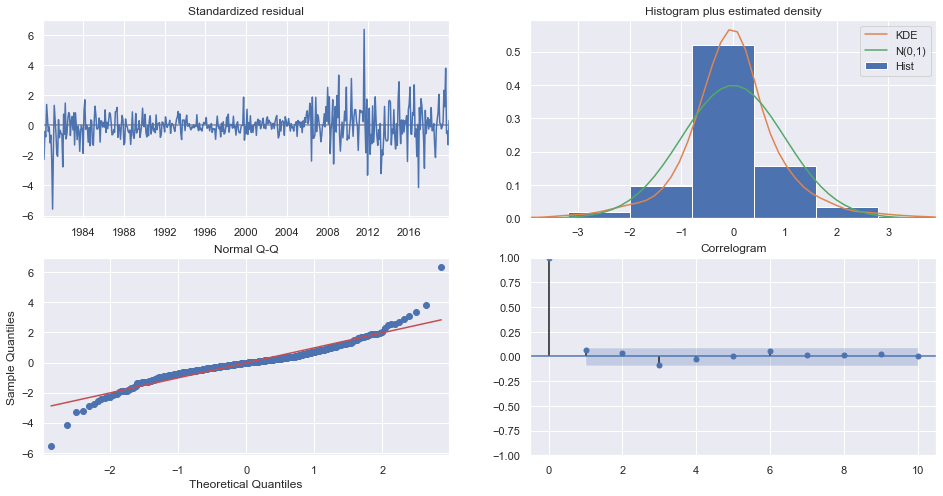

In [32]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

Looking at the plot of the top right, we can see some variation between the red KDE line and the N(0,1), where N(0,1) is standard notation for a normal distribution with a mean 0 and a standard deviation of 1. Although the two lines do not closely follow each other, our residuals are still close to normal distribution. 

The qq-plot, on the bottom left, shows the ordered distribution of residuals (blue dots) generally follow a linear trend of the samples taken from a standard normal distirbution N(0,1), which is also a strong indication of residuals being normally distributed.

The correlogram plot (bottom right) shows the time series residuals have low correlation with lagged versions of itself, confirming no obvious seasonality. 

From the above, we can conclude, although improvements can be made, the model has a satisfactory fit.

The next step is to validate the forecast by comparing predicted and real prices, we will start at 2015-01-01 to the end of the data

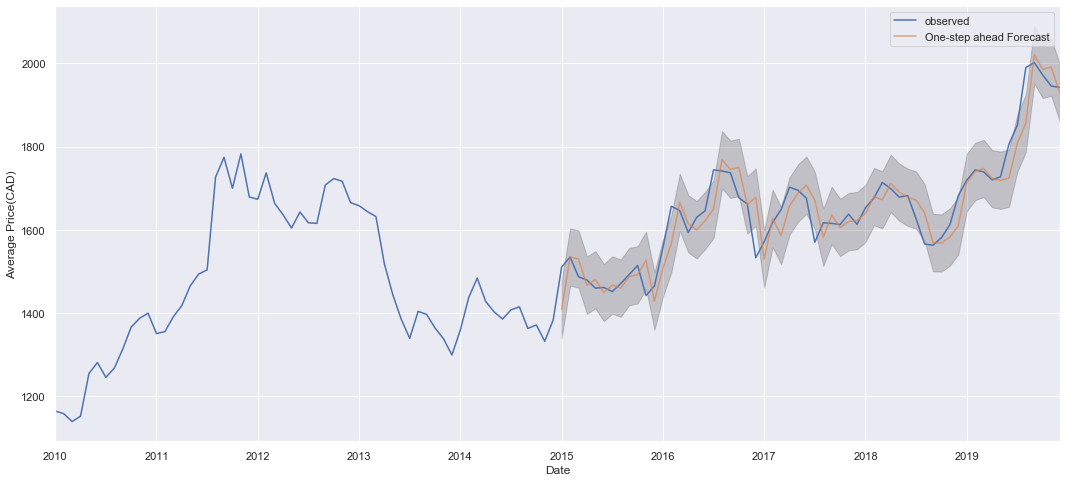

In [37]:
pred = results.get_prediction(start=pd.to_datetime('2015-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['2010':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Average Price(CAD)')
plt.legend()

plt.show()

Overall, our predicted values seem to align well with the overal trend.

In order to quantify this will will calculate the MSE (Mean Squared Error), and the root mean squared error.

In [35]:
y_forecasted = pred.predicted_mean
y_truth = y['2015-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 2298.23


In [36]:
print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Root Mean Squared Error of our forecasts is 47.94


The above tells us that our model was able to forecast the average price within 47.94 of the real average price

Let's try a larger chunk of the data to confirm

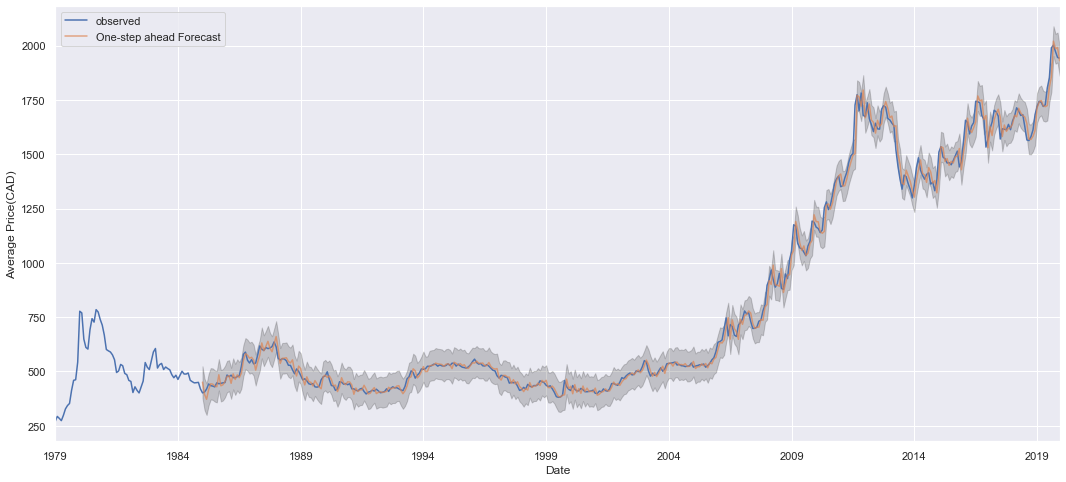

In [41]:
pred = results.get_prediction(start=pd.to_datetime('1985-01-01'), dynamic=False)
pred_ci = pred.conf_int()

ax = y['1975':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7)

ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)

ax.set_xlabel('Date')
ax.set_ylabel('Average Price(CAD)')
plt.legend()

plt.show()

In [42]:
y_forecasted = pred.predicted_mean
y_truth = y['1985-01-01':]

# Compute the mean square error
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

print('The Root Mean Squared Error of our forecasts is {}'.format(round(np.sqrt(mse), 2)))

The Mean Squared Error of our forecasts is 1138.65
The Root Mean Squared Error of our forecasts is 33.74


Overall, the model seems fairly accurate 

## Producing the Forecast <a name="forecast"></a>

Finally, we will now produce the forecasted values

In [47]:
# Get forecast 300 steps ahead in future
pred_uc = results.get_forecast(steps=300)

# Get confidence intervals of forecasts
pred_ci = pred_uc.conf_int()

using this we will plot the time series and the forecasts of its future values

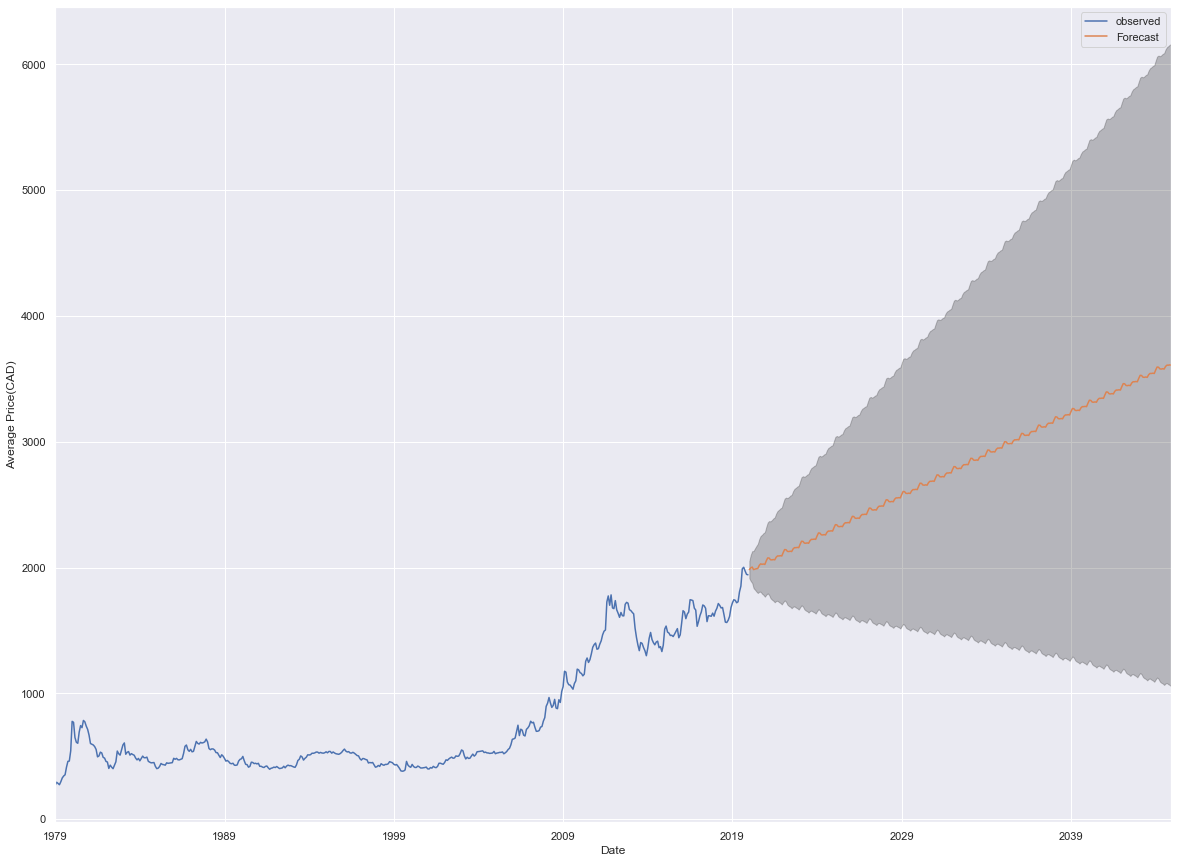

In [48]:
ax = y.plot(label='observed', figsize=(20, 15))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Average Price(CAD)')

plt.legend()
plt.show()

As we can see from the above, based on our model, average gold prices are set to increase overall.

## Conclusion <a name="conclusion"></a>

In conclusion, based on our forecast model, the average daily price of gold is expected to increase within the next few decades. Based on this it may be a worthwhile investment for those interested in investing in gold.